In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# read the file
df = pd.read_csv('AlumniGiving - DonationHistory.csv')
df.head()

,ACCOUNT_ID,NUMBER_OF_DONATIONS,VALUE_OF_DONATIONS,CITY,STATE,ZIP,MI,ALUMNI_TYPE,UG_CLASS_YEAR,UG_SCHOOL,GRAD_DEGREE,GRAD_CLASS_YEAR,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC
0,003o000000pO6zhAAC,0,0.0,Gainesville,FL,32605-6400,NaN,Graduate,1969,NaN,MS,1969.0,College of Arts and Sci (Sci),M,N,0,0
1,003o000000pOSIxAAO,1,100.0,Pasadena,CA,91105-1515,NaN,Graduate,1968,NaN,JD,1968.0,School of Law,M,N,0,1
2,003o000000pNvhHAAS,4,1700.0,San Rafael,CA,94901-2478,NaN,Graduate,1964,NaN,JD,1964.0,School of Law,M,N,0,0
3,003o000000q0hl1AAA,0,0.0,San Antonio,TX,78232-4154,T,Undergraduate,1967,School of Nursing,NaN,NaN,NaN,F,N,0,0
4,003o000000pOZe9AAG,5,500.0,Westborough,MA,1581,NaN,Undergraduate,1964,School of Business,NaN,NaN,NaN,M,N,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118854 entries, 0 to 118853
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ACCOUNT_ID           118854 non-null  object 
 1   NUMBER_OF_DONATIONS  118854 non-null  int64  
 2   VALUE_OF_DONATIONS   118854 non-null  float64
 3   CITY                 99728 non-null   object 
 4   STATE                99728 non-null   object 
 5   ZIP                  99728 non-null   object 
 6   MI                   12957 non-null   object 
 7   ALUMNI_TYPE          118854 non-null  object 
 8   UG_CLASS_YEAR        118854 non-null  int64  
 9   UG_SCHOOL            70297 non-null   object 
 10  GRAD_DEGREE          54423 non-null   object 
 11  GRAD_CLASS_YEAR      54422 non-null   float64
 12  GRAD_SCHOOL          54393 non-null   object 
 13  GENDER               118854 non-null  object 
 14  MARRIED_TO_ALUM      118854 non-null  object 
 15  ROTC             

<AxesSubplot:xlabel='VALUE_OF_DONATIONS', ylabel='NUMBER_OF_DONATIONS'>

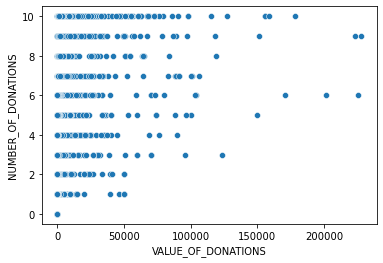

In [4]:
sns.scatterplot(data=df,y='NUMBER_OF_DONATIONS',x='VALUE_OF_DONATIONS')

In [5]:
# creating an instance of Labelencoder

def label_encoder(df,columns):
    encoders = {}
    for col in columns:
        le = LabelEncoder().fit(df[col])
        df[col] = le.transform(df[col])
    return df, encoders

columns=["CITY","ALUMNI_TYPE","STATE","UG_SCHOOL","GRAD_DEGREE","GRAD_SCHOOL","GENDER","MARRIED_TO_ALUM"]
label_encoder(df,columns)

(                ACCOUNT_ID  NUMBER_OF_DONATIONS  VALUE_OF_DONATIONS  CITY  \
 0       003o000000pO6zhAAC                    0                 0.0  1406   
 1       003o000000pOSIxAAO                    1               100.0  3029   
 2       003o000000pNvhHAAS                    4              1700.0  3554   
 3       003o000000q0hl1AAA                    0                 0.0  3519   
 4       003o000000pOZe9AAG                    5               500.0  4347   
 ...                    ...                  ...                 ...   ...   
 118849  0031J00001Uxe4RQAR                    0                 0.0  3532   
 118850  0031J00001Wsp1cQAB                    0                 0.0  2631   
 118851  0031J00001W3RyKQAV                    0                 0.0  3153   
 118852  0031J00001U449tQAB                    0                 0.0  4515   
 118853  0031J00001U4HvRQAV                    0                 0.0   118   
 
         STATE         ZIP   MI  ALUMNI_TYPE  UG_CLASS_YEAR  U

In [6]:
df_orignal = pd.read_csv('AlumniGiving - DonationHistory.csv')
df_label=pd.merge(df[columns],df_orignal,left_index=True,right_index=True)
df_label.head()

,CITY_x,ALUMNI_TYPE_x,STATE_x,UG_SCHOOL_x,GRAD_DEGREE_x,GRAD_SCHOOL_x,GENDER_x,MARRIED_TO_ALUM_x,ACCOUNT_ID,NUMBER_OF_DONATIONS,...,ALUMNI_TYPE_y,UG_CLASS_YEAR,UG_SCHOOL_y,GRAD_DEGREE_y,GRAD_CLASS_YEAR,GRAD_SCHOOL_y,GENDER_y,MARRIED_TO_ALUM_y,ROTC,JC
0,1406,0,13,10,28,2,1,0,003o000000pO6zhAAC,0,...,Graduate,1969,NaN,MS,1969.0,College of Arts and Sci (Sci),M,N,0,0
1,3029,0,8,10,4,7,1,0,003o000000pOSIxAAO,1,...,Graduate,1968,NaN,JD,1968.0,School of Law,M,N,0,1
2,3554,0,8,10,4,7,1,0,003o000000pNvhHAAS,4,...,Graduate,1964,NaN,JD,1964.0,School of Law,M,N,0,0
3,3519,1,51,9,38,9,0,0,003o000000q0hl1AAA,0,...,Undergraduate,1967,School of Nursing,NaN,NaN,NaN,F,N,0,0
4,4347,1,25,6,38,9,1,0,003o000000pOZe9AAG,5,...,Undergraduate,1964,School of Business,NaN,NaN,NaN,M,N,0,1


In [7]:
df_label.to_csv ('label.csv')

In [8]:
df.head()

,ACCOUNT_ID,NUMBER_OF_DONATIONS,VALUE_OF_DONATIONS,CITY,STATE,ZIP,MI,ALUMNI_TYPE,UG_CLASS_YEAR,UG_SCHOOL,GRAD_DEGREE,GRAD_CLASS_YEAR,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC
0,003o000000pO6zhAAC,0,0.0,1406,13,32605-6400,NaN,0,1969,10,28,1969.0,2,1,0,0,0
1,003o000000pOSIxAAO,1,100.0,3029,8,91105-1515,NaN,0,1968,10,4,1968.0,7,1,0,0,1
2,003o000000pNvhHAAS,4,1700.0,3554,8,94901-2478,NaN,0,1964,10,4,1964.0,7,1,0,0,0
3,003o000000q0hl1AAA,0,0.0,3519,51,78232-4154,T,1,1967,9,38,NaN,9,0,0,0,0
4,003o000000pOZe9AAG,5,500.0,4347,25,1581,NaN,1,1964,6,38,NaN,9,1,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118854 entries, 0 to 118853
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ACCOUNT_ID           118854 non-null  object 
 1   NUMBER_OF_DONATIONS  118854 non-null  int64  
 2   VALUE_OF_DONATIONS   118854 non-null  float64
 3   CITY                 118854 non-null  int32  
 4   STATE                118854 non-null  int32  
 5   ZIP                  99728 non-null   object 
 6   MI                   12957 non-null   object 
 7   ALUMNI_TYPE          118854 non-null  int32  
 8   UG_CLASS_YEAR        118854 non-null  int64  
 9   UG_SCHOOL            118854 non-null  int32  
 10  GRAD_DEGREE          118854 non-null  int32  
 11  GRAD_CLASS_YEAR      54422 non-null   float64
 12  GRAD_SCHOOL          118854 non-null  int32  
 13  GENDER               118854 non-null  int32  
 14  MARRIED_TO_ALUM      118854 non-null  int32  
 15  ROTC             

In [10]:
df_drop=df.drop(['ACCOUNT_ID','ZIP','MI','GRAD_CLASS_YEAR','UG_CLASS_YEAR'],axis=1)

In [11]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118854 entries, 0 to 118853
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   NUMBER_OF_DONATIONS  118854 non-null  int64  
 1   VALUE_OF_DONATIONS   118854 non-null  float64
 2   CITY                 118854 non-null  int32  
 3   STATE                118854 non-null  int32  
 4   ALUMNI_TYPE          118854 non-null  int32  
 5   UG_SCHOOL            118854 non-null  int32  
 6   GRAD_DEGREE          118854 non-null  int32  
 7   GRAD_SCHOOL          118854 non-null  int32  
 8   GENDER               118854 non-null  int32  
 9   MARRIED_TO_ALUM      118854 non-null  int32  
 10  ROTC                 118854 non-null  int64  
 11  JC                   118854 non-null  int64  
dtypes: float64(1), int32(8), int64(3)
memory usage: 7.3 MB


In [12]:
# change the order of attribute
attribute=('NUMBER_OF_DONATIONS','CITY','STATE','ALUMNI_TYPE','UG_CLASS_YEAR',
           'UG_SCHOOL','GRAD_DEGREE','GRAD_CLASS_YEAR','GRAD_SCHOOL','GENDER',
           'MARRIED_TO_ALUM','ROTC','JC','VALUE_OF_DONATIONS')
corr_data = df.reindex(attribute, axis=1)
corr_data

,NUMBER_OF_DONATIONS,CITY,STATE,ALUMNI_TYPE,UG_CLASS_YEAR,UG_SCHOOL,GRAD_DEGREE,GRAD_CLASS_YEAR,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC,VALUE_OF_DONATIONS
0,0,1406,13,0,1969,10,28,1969.0,2,1,0,0,0,0.0
1,1,3029,8,0,1968,10,4,1968.0,7,1,0,0,1,100.0
2,4,3554,8,0,1964,10,4,1964.0,7,1,0,0,0,1700.0
3,0,3519,51,1,1967,9,38,NaN,9,0,0,0,0,0.0
4,5,4347,25,1,1964,6,38,NaN,9,1,0,0,1,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118849,0,3532,8,0,2021,10,6,2021.0,1,0,0,0,0,0.0
118850,0,2631,8,1,1984,2,38,NaN,9,1,0,0,0,0.0
118851,0,3153,8,0,2021,10,6,2021.0,1,0,0,0,0,0.0
118852,0,4515,60,0,2020,10,5,2020.0,7,1,0,0,0,0.0


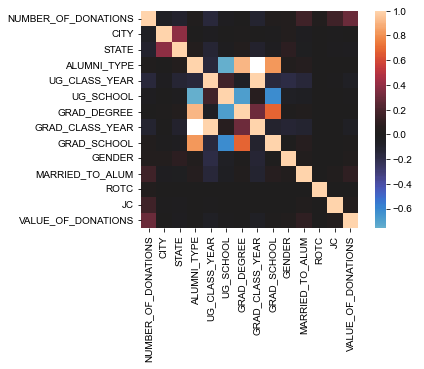

In [13]:
# plot a heatmap to see the correlation
df_corr = corr_data.corr()
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns,center=0,square=True)
sns.set(rc={'figure.figsize':(8,8)})

In [14]:
# create a new column-have made donation or not, 1=yes,0=never
def donated_or_not(row):
    if row['VALUE_OF_DONATIONS'] == 0:
        return 0
    else:
        return 1

df_drop['DONATE']= df_drop.apply(lambda row: donated_or_not(row), axis=1)

### Models
1. Y is donate or not (simple binary)

In [15]:
x = df_drop.drop(['VALUE_OF_DONATIONS','NUMBER_OF_DONATIONS','DONATE'],axis=1)
y = df_drop['DONATE']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from imblearn.under_sampling import RandomUnderSampler

Ran = RandomUnderSampler(random_state=42)
X_res, Y_res = Ran.fit_resample(X_train, Y_train)

In [18]:
from collections import Counter
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(Y_res))

Original dataset shape Counter({0: 98620, 1: 20234})
Resampled dataset shape Counter({0: 16202, 1: 16202})


### 1. LGBMClassifier

In [22]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score


def f1_metric(ytrue,preds):
    ''' Return the F1 Score value for the preds and true values, ytrue '''
    return 'f1_score', f1_score((preds>=0.5).astype('int'), ytrue, average='macro'), True

params = {
    'learning_rate': 0.06,
    'n_estimators': 1500,
    'colsample_bytree': 0.5,
    'metric': 'f1_score'
}

full_clf = LGBMClassifier(**params)

full_clf.fit(X_train, Y_train,
             eval_set=[(X_train, Y_train), (X_test, Y_test)],
             verbose=400, eval_metric=f1_metric)

C:\Users\gina3\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[400]	training's f1_score: 0.564399	valid_1's f1_score: 0.537252
[800]	training's f1_score: 0.57766	valid_1's f1_score: 0.545264
[1200]	training's f1_score: 0.586373	valid_1's f1_score: 0.547918


LGBMClassifier(colsample_bytree=0.5, learning_rate=0.06, metric='f1_score',
               n_estimators=1500)

In [23]:
#Show the LGBM results - no resample
print("train score:", full_clf.score(X_train, Y_train))
print("test score:", full_clf.score(X_test, Y_test))

train score: 0.8469758000904473
test score: 0.8349249085019562


In [24]:
full_clf.fit(X_res, Y_res,
             eval_set=[(X_res, Y_res), (X_test, Y_test)],
             verbose=400, eval_metric=f1_metric)

C:\Users\gina3\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[400]	training's f1_score: 0.676479	valid_1's f1_score: 0.5682
[800]	training's f1_score: 0.691971	valid_1's f1_score: 0.565556
[1200]	training's f1_score: 0.701421	valid_1's f1_score: 0.563971


LGBMClassifier(colsample_bytree=0.5, learning_rate=0.06, metric='f1_score',
               n_estimators=1500)

In [25]:
#Show the LGBM results - resample
print("train score:", full_clf.score(X_res, Y_res))
print("test score:", full_clf.score(X_test, Y_test))

train score: 0.7071657820022219
test score: 0.6488578520045434


### 2. Random Forest

In [28]:
from sklearn import ensemble
rf_classifier  = ensemble.RandomForestClassifier(n_estimators=140, max_depth=30, random_state=30)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=30, n_estimators=140, random_state=30)

In [29]:
#Show the Random Forest results - no resample
print("train score:", rf_classifier.score(X_train, Y_train))
print("test score:", rf_classifier.score(X_test, Y_test))

train score: 0.8911477340849574
test score: 0.8150267132219932


### Picking

In [ ]:
df_non_donor = df_drop[df_drop['NUMBER_OF_DONATIONS']==0]
df_non_donor.shape

In [ ]:
df_non_donor=df_non_donor.drop(['VALUE_OF_DONATIONS','NUMBER_OF_DONATIONS','DONATE'],axis=1)

In [ ]:
proba=full_clf.predict_proba(df_non_donor)
proba

In [ ]:
non_donor_y = full_clf.predict(df_non_donor)
print(non_donor_y) 

In [ ]:
df_non_donor['Y']=non_donor_y 

In [ ]:
df_non_donor['Proba_NO']=proba.T[0]
df_non_donor['Proba_YES']=proba.T[1]

In [ ]:
df_non_donor.head()

In [ ]:
df_picked=df_non_donor.nlargest(n=10000, columns=['Proba_YES'])

In [ ]:
df_picked.head()

In [ ]:
df_picked=pd.merge(df_picked,df['ACCOUNT_ID'],left_index=True,right_index=True)
df_picked.head()

In [ ]:
df.iloc[14790]

In [ ]:
df_picked['ACCOUNT_ID']

In [ ]:
df_picked.to_csv ('id.csv')

In [ ]:
attribute=('CITY','STATE','ALUMNI_TYPE','UG_CLASS_YEAR',
           'UG_SCHOOL','GRAD_DEGREE','GRAD_CLASS_YEAR','GRAD_SCHOOL','GENDER',
           'MARRIED_TO_ALUM','ROTC','JC','Proba_YES')
corr_data = df_picked.reindex(attribute, axis=1)
corr_data.head()

In [ ]:
# plot a heatmap to see the correlation
df_corr = corr_data.corr()
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns,center=0,square=True)
sns.set(rc={'figure.figsize':(8,8)})

In [ ]:
sns.barplot(data=df_picked,y='Proba_YES',x='JC')

### Linear Regreesion
2. Y is a continuous value

In [ ]:
x = df_drop.drop(['VALUE_OF_DONATIONS','NUMBER_OF_DONATIONS','DONATE','AVG_VALUE'],axis=1)
y = df_drop['AVG_VALUE'].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
Lin= LinearRegression()
Lin.fit(X_train,Y_train)

In [ ]:
#Show the liner regression results
print("train score:", Lin.score(X_train, Y_train))
print("test score:", Lin.score(X_test, Y_test))